# Проект исследования дохода оператора сотовой связи

### Описание проекта

<dl>Компания «Мегалайн» — федеральный оператора сотовой связи, предоставила  данные по небольшой выборке клиентов 2 тарифов предоставления мобильной связи. Нужно проанализировать поведение клиентов оператора и сделать вывод — какой тариф лучше.</dl>

<dt>Описание тарифов</dt>
<dl></dl>
<dl>Тариф «Смарт»</dl>

<li>Ежемесячная плата: 550 рублей</li>
<li> Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика</li>
<li>Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1     Гб интернет-трафика: 200 рублей.</li>
<dl></dl>    
<dl>Тариф «Ультра»</dl>

<li> Ежемесячная плата: 1950 рублей</li>
<li>  Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика</li>
<li>    Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.</li>
<dl></dl>
<dl>   Примечание:</dl>
<dl>  Оператор всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.</dl>
<dl>   Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.</dl>



### Исследование данных

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [15]:
d_c=pd.read_csv('calls.csv')

#функция для отображения сведений о датафрейме.
def counts(df):
    display(df.info())
    display(df.head(10))
    display(df.shape)
    display(df.describe())
    display(df.columns)
    display(df.max())
    display(df.min())

counts(d_c)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


(202607, 4)

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

id              1499_99
call_date    2018-12-31
duration          38.00
user_id            1499
dtype: object

id               1000_0
call_date    2018-01-01
duration           0.00
user_id            1000
dtype: object

In [16]:
#просмотр уникальных значений по частоте встречаемости.
for value in d_c:
    print(d_c[value].value_counts().sort_values())

1000_0      1
1000_23     1
1000_2      1
1000_3      1
1000_4      1
           ..
1499_213    1
1499_214    1
1499_215    1
1499_217    1
1499_219    1
Name: id, Length: 202607, dtype: int64
2018-01-01       5
2018-01-03       7
2018-01-02       9
2018-01-07      18
2018-01-05      20
              ... 
2018-12-26    1149
2018-12-22    1158
2018-12-30    1192
2018-12-29    1202
2018-12-31    1435
Name: call_date, Length: 365, dtype: int64
26.90        1
26.05        1
26.77        1
25.85        1
25.76        1
         ...  
6.38       141
6.15       141
5.50       142
4.49       142
0.00     39613
Name: duration, Length: 2871, dtype: int64
1257      14
1016      20
1373      24
1442      28
1397      33
        ... 
1196    1240
1453    1440
1375    1560
1168    1692
1377    1760
Name: user_id, Length: 492, dtype: int64


In [17]:
d_i=pd.read_csv('internet.csv')

counts(d_i)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


(149396, 5)

,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Unnamed: 0          149395
id                 1499_99
mb_used           1,724.83
session_date    2018-12-31
user_id               1499
dtype: object

Unnamed: 0               0
id                  1000_0
mb_used               0.00
session_date    2018-01-01
user_id               1000
dtype: object

In [18]:
#просмотр уникальных значений по частоте встречаемости.
for value in d_i:
    print(d_i[value].value_counts().sort_values())

0         1
17        1
8         1
2         1
3         1
         ..
149379    1
149389    1
149390    1
149374    1
149395    1
Name: Unnamed: 0, Length: 149396, dtype: int64
1000_0      1
1000_17     1
1000_8      1
1000_2      1
1000_3      1
           ..
1499_140    1
1499_150    1
1499_151    1
1499_135    1
1499_156    1
Name: id, Length: 149396, dtype: int64
23.72         1
798.27        1
588.84        1
207.27        1
870.53        1
          ...  
513.25        8
197.56        9
447.30        9
335.91        9
0.00      19598
Name: mb_used, Length: 70003, dtype: int64
2018-01-01       3
2018-01-02       3
2018-01-03       6
2018-01-04       9
2018-01-05      14
              ... 
2018-12-22     834
2018-12-26     844
2018-12-25     859
2018-12-30     903
2018-12-31    1057
Name: session_date, Length: 365, dtype: int64
1399      8
1192     22
1343     26
1467     27
1151     35
       ... 
1251    759
1240    764
1204    789
1227    812
1496    834
Name: user_id, Length:

In [19]:
d_m=pd.read_csv('messages.csv')

counts(d_m)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


(123036, 3)

,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


Index(['id', 'message_date', 'user_id'], dtype='object')

id                 1499_99
message_date    2018-12-31
user_id               1499
dtype: object

id                  1000_0
message_date    2018-01-02
user_id               1000
dtype: object

In [20]:
display(d_m.max())
d_m.min()  

id                 1499_99
message_date    2018-12-31
user_id               1499
dtype: object

id                  1000_0
message_date    2018-01-02
user_id               1000
dtype: object

In [21]:
d_t=pd.read_csv('tariffs.csv')

counts(d_t)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


(2, 8)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.00,2.00,2.00,2.00,2.00,2.00,2.00
mean,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
std,671.75,"10,861.16","1,767.77",989.95,35.36,1.41,1.41
min,50.00,"15,360.00",500.00,550.00,150.00,1.00,1.00
25%,287.50,"19,200.00","1,125.00",900.00,162.50,1.50,1.50
50%,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
75%,762.50,"26,880.00","2,375.00","1,600.00",187.50,2.50,2.50
max,"1,000.00","30,720.00","3,000.00","1,950.00",200.00,3.00,3.00


Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

messages_included         1000
mb_per_month_included    30720
minutes_included          3000
rub_monthly_fee           1950
rub_per_gb                 200
rub_per_message              3
rub_per_minute               3
tariff_name              ultra
dtype: object

messages_included           50
mb_per_month_included    15360
minutes_included           500
rub_monthly_fee            550
rub_per_gb                 150
rub_per_message              1
rub_per_minute               1
tariff_name              smart
dtype: object

In [22]:
d_u = pd.read_csv('users.csv')

counts(d_u)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


(500, 8)

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

user_id             1499
age                   75
city           Ярославль
first_name           Яна
last_name          Яшина
reg_date      2018-12-31
tariff             ultra
dtype: object

user_id              1000
age                    18
city          Архангельск
first_name      Авксентий
last_name          Ёлчина
reg_date       2018-01-01
tariff              smart
dtype: object

In [23]:
#просмотр уникальных значений по частоте встречаемости.
for value in d_u:
    print(d_u[value].value_counts().sort_values())
#проверка на наличие неявных дубликатов. Данные чистые, можно будет в дальнейшем сделать тест по данному столбцу.
display(d_u['city'].unique())

1000    1
1003    1
1004    1
1005    1
1006    1
       ..
1471    1
1470    1
1469    1
1488    1
1499    1
Name: user_id, Length: 500, dtype: int64
61     3
57     4
49     4
38     5
33     5
34     5
22     5
72     5
59     6
54     6
75     6
18     6
74     7
25     7
46     7
35     7
67     7
43     7
31     7
32     7
55     8
62     8
69     8
44     8
60     8
30     9
56     9
20     9
51     9
28     9
68     9
24     9
48     9
19     9
65     9
50     9
23     9
66     9
27     9
45    10
41    10
70    10
58    10
36    10
52    10
47    11
26    11
39    11
29    11
37    11
40    12
21    12
73    12
71    13
64    13
63    13
42    14
53    14
Name: age, dtype: int64
2018-12-24    1
2018-12-11    1
2018-12-26    1
2018-08-31    1
2018-12-23    1
2018-11-07    1
2018-12-16    1
2018-12-20    1
2018-11-30    1
2018-12-18    1
2018-09-02    1
2018-10-04    1
2018-08-17    1
2018-11-22    1
2018-09-26    1
2018-11-21    1
2018-10-25    1
2018-12-25    1
2018-11-13    1

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

<dl>На первый взгляд исследумые данные чистые от случайных ошибок или опечаток. Даты в пределах достоверности, потраченные минуты разговора и использованные услуги также кажутся достоверными. Возраст пользователей также соответствует ожиданию: начинается с 18 лет, хотя операторы и могут продавать сим-карты несовершеннолетним, но делает это с опеределнными оговорками и чаще все-таки они регистрируются на их родителей.</dl>
<dl>Единственное, что упущено, так это формат даты, изменение которого на корректный упростит нам дальнейшую обработку данных. </dl>
   <dl>Пустые значения в "churn_date" логично объясняются тем, что абонент продолжает пользоваться тарифом, да и для наших целей заполненность данного куска таблицы не первостепенно.</dl>
<dl>Много "0" значений, которые появились в следствии неиспользованных услуг, когда пользователь просто не применял все привелегии своего тарифа или не успел это сделать на дату отчета. Часто бывает, что, к примеру, пожилые люди не пользуются включенным в тариф интеренетом. СМС же давно уступили свое место мессенджерам у младшего поколения и также остается зачастую неиспользованными. Отдельно стоит выделить категорию не принятых звонков, которые оператор фиксирует и отмечает 0. </dl>
<dl>Учитывае все эти моменты вопрос большого количества 0 в данных можно с легкой душой отпустить.</dl>

### Замена типа данных. Создание ключевого столбца.


In [24]:
#собственная функция для замены типа данных на временный.
def date_time(series):
    return pd.to_datetime(series, format='%Y-%m-%d')
    
#заменяем типы данных в столбцах, применяя функицю.
d_c['call_date'] = d_c['call_date'].apply(date_time)
d_u['reg_date'] = d_u['reg_date'].apply(date_time)
d_m['message_date'] = d_m['message_date'].apply(date_time)
d_u['churn_date'] = d_u['churn_date'].apply(date_time)
d_i['session_date'] = d_i['session_date'].apply(date_time)

#создаем новый столбец с месяцем в каждом дф.
d_c['month'] = pd.DatetimeIndex(d_c['call_date']).month 

d_i['month'] = pd.DatetimeIndex(d_i['session_date']).month 

d_u['month'] = pd.DatetimeIndex(d_u['reg_date']).month 

d_m['month'] = pd.DatetimeIndex(d_m['message_date']).month 

d_u['end_month'] = pd.DatetimeIndex(d_u['churn_date']).month 


#проверка
#d_u.info()
    
#d_c.info()

#d_i.info()

#d_m.info()

<dl>Приведение типа данных к временному в пандасе позволило нам создать общий, а точнее ключевой столбец с месяцем для всех исходных таблиц для нашего исследования. Вторым ключевым столбцом является ID пользователя, который также мелькает в каждой таблице. </dl>
    
    

### Агрегирование таблиц

In [25]:
#округление звонков, каждого до минуты. 
d_c['duration'] = d_c['duration'].apply(np.ceil)

#создание сводных таблиц.
d_c_grouped = d_c.groupby(['user_id','month']).agg({'duration':'sum'}).rename(columns={'duration':'calls_duration'})
d_c_grouped['calls_count'] = d_c.groupby(['user_id','month']).agg({'duration':'count'})
d_m_grouped = d_m.groupby(['user_id','month']).agg({'message_date':'count'}).rename(columns={'message_date':'message_sum'})
d_i_grouped = d_i.groupby(['user_id','month']).agg({'mb_used':'sum'}).rename(columns={'mb_used':'mb_sum'})

#переименовываем столбец в тарифах для склейки.
d_t = d_t.rename(columns = {'tariff_name':'tariff'})

#округление суммы израсходованного интернет-трафика. Перевод трафика в гиги.
d_i_grouped['gb_sum'] = np.ceil(d_i_grouped['mb_sum']/1024)

display(d_c_grouped)
display(d_m_grouped)
display(d_i_grouped)

#сведение общей таблицы.
report = d_c_grouped.merge(d_m_grouped, on = ['user_id', 'month'], how = 'outer')
report = report.merge(d_i_grouped, on = ['user_id', 'month'], how = 'outer').fillna(0)
report  = report.merge(d_u, on = ['user_id'], how = 'outer')
report  = report.merge(d_t, on = ['tariff'], how = 'outer')

display(d_t)
display(report)

#проверка
#display(report.info())
#display(report.isna())

#выделение превышения лимита трафика 
def overdraft(row):
    over_minutes = (row['calls_duration'] - row['minutes_included']) *  row['rub_per_minute']
    over_messages = (row['message_sum'] - row['messages_included']) *  row['rub_per_message']
    over_traffic = (row['gb_sum'] - (row['mb_per_month_included']/1024)) *  row['rub_per_gb']
    if over_minutes < 0: 
        over_minutes = 0
    if over_messages < 0: 
        over_messages = 0
    if over_traffic < 0: 
        over_traffic = 0    
    return over_minutes +over_messages+over_traffic
    
#добавление в таблицу выручки по клиенту.    
report['profit'] = report.apply(overdraft, axis = 1)

#проверка
#display(report)
#display(report['profit'].max()) 

#проверка количества явных дубликатов
display(report.duplicated().sum()) 
#проверили на явные дубликаты, их не обнаружилось, поэтому лишние действия по чистке закомментила.
#report = report.drop_duplicates().reset_index(drop=True) # чистка от явных дубликатов

#проверяем нет ли пустых пользователей в сводной таблице.
display(report.loc[report['calls_duration'].isna()	& report['message_sum'].isna() & report['mb_sum'].isna()])
#удалим строки пустых пользовтаелей, которые не пользовались услугами.
report = report.dropna(subset=['calls_duration','message_sum','mb_sum'])
#проверка, что удалены.
#display(report.loc[report['calls_duration'].isna()	& report['message_sum'].isna() & report['mb_sum'].isna()])

#проверка отсутствия пустых значений в столбце тарифов.
display(report[report['tariff'] ==0])
display(report[report['tariff'].isna()])
#в столбце звонков по времени, дохода.
#display(report[report['calls_duration'].isna()])
#display(report[report['profit'].isna()])

# проверка в столбце дохода на адекватные значения.
#display(report['profit'].unique())


calls_duration  calls_count
user_id month                             
1000    5              159.00           22
        6              172.00           43
        7              340.00           47
        8              408.00           52
        9              466.00           58
...                       ...          ...
1498    10             247.00           41
1499    9               70.00            9
        10             449.00           68
        11             612.00           74
        12             492.00           69

[3174 rows x 2 columns]

message_sum
user_id month             
1000    5               22
        6               60
        7               75
        8               81
        9               57
...                    ...
1498    10              42
1499    9               11
        10              48
        11              59
        12              66

[2717 rows x 1 columns]

mb_sum  gb_sum
user_id month                  
1000    5      2,253.49    3.00
        6     23,233.77   23.00
        7     14,003.64   14.00
        8     14,055.93   14.00
        9     14,568.91   15.00
...                 ...     ...
1498    10    20,579.36   21.00
1499    9      1,845.75    2.00
        10    17,788.51   18.00
        11    17,963.31   18.00
        12    13,055.58   13.00

[3203 rows x 2 columns]

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,calls_duration,calls_count,message_sum,mb_sum,gb_sum,age,churn_date,city,first_name,...,tariff,month,end_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,159.00,22.00,22.00,"2,253.49",3.00,52,NaT,Краснодар,Рафаил,...,ultra,5,NaN,1000,30720,3000,1950,150,1,1
1,1000,172.00,43.00,60.00,"23,233.77",23.00,52,NaT,Краснодар,Рафаил,...,ultra,5,NaN,1000,30720,3000,1950,150,1,1
2,1000,340.00,47.00,75.00,"14,003.64",14.00,52,NaT,Краснодар,Рафаил,...,ultra,5,NaN,1000,30720,3000,1950,150,1,1
3,1000,408.00,52.00,81.00,"14,055.93",14.00,52,NaT,Краснодар,Рафаил,...,ultra,5,NaN,1000,30720,3000,1950,150,1,1
4,1000,466.00,58.00,57.00,"14,568.91",15.00,52,NaT,Краснодар,Рафаил,...,ultra,5,NaN,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,0.00,0.00,32.00,"17,206.30",17.00,35,NaT,Санкт-Петербург,Павел,...,smart,8,NaN,50,15360,500,550,200,3,3
3212,1489,0.00,0.00,21.00,"19,559.44",20.00,35,NaT,Санкт-Петербург,Павел,...,smart,8,NaN,50,15360,500,550,200,3,3
3213,1489,0.00,0.00,20.00,"17,491.56",18.00,35,NaT,Санкт-Петербург,Павел,...,smart,8,NaN,50,15360,500,550,200,3,3
3214,1489,0.00,0.00,35.00,"17,322.51",17.00,35,NaT,Санкт-Петербург,Павел,...,smart,8,NaN,50,15360,500,550,200,3,3


0

,user_id,calls_duration,calls_count,message_sum,mb_sum,gb_sum,age,churn_date,city,first_name,...,month,end_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
985,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,...,12,12.00,1000,30720,3000,1950,150,1,1,NaN
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,...,12,12.00,50,15360,500,550,200,3,3,NaN


,user_id,calls_duration,calls_count,message_sum,mb_sum,gb_sum,age,churn_date,city,first_name,...,month,end_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit


,user_id,calls_duration,calls_count,message_sum,mb_sum,gb_sum,age,churn_date,city,first_name,...,month,end_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit


<dl>В новой сведенной нами таблице нашлись пользователи, которые не успели или не захотели попользоваться улсугами оператора. Для ислледования их данные нам точно не пригодятся, поэтому моим коллективным решением они были удалены из исследования.</dl>
<dl>Опять же отдельно хочется отметить хорошую предобработку данных, либо грамотно собранный материал: полных дубликатов обнаружено не было. Также в столбцах нет скрытых дубликатов: названия городов, имена – написаны в едином формате без повторов. По этой причине мы можем позволить себе не подвергать данные лемматизации и приведению к нижнему регистру, а оставить их в первоначальном виде, облегчая свою задачу. </dl>

### Гистограммы

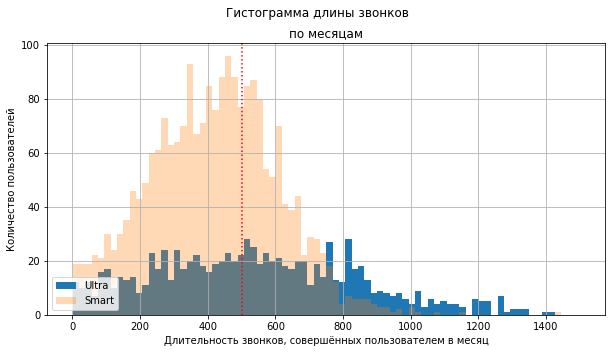

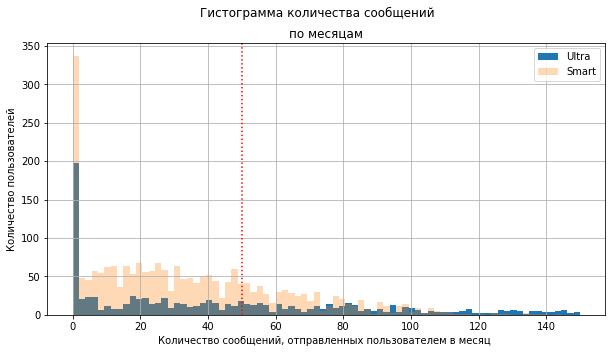

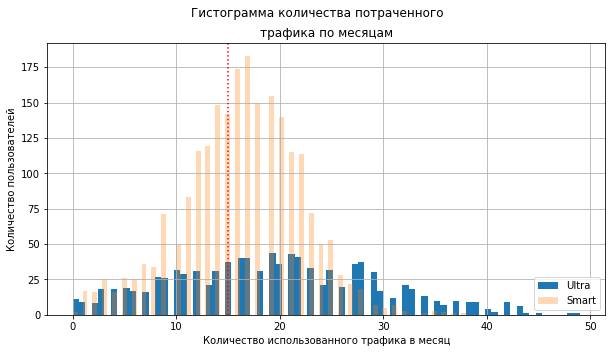

In [26]:
# Построим гистограммы по столбцам duration, messages и gb_used в сгруппированном фрейме:

report.loc[report['tariff']=='ultra','calls_duration'].plot(kind = 'hist', bins = 80, range=(1,1500), figsize =(10,5), grid=True, label='Ultra')
report.loc[report['tariff']=='smart','calls_duration'].plot(kind = 'hist', bins = 80, range=(1,1500), figsize =(10,5), grid=True, alpha=0.3,label='Smart')
plt.axvline(x=500, color ='red',linestyle = ':') #граница тарифа Смарт
plt.legend(loc='lower left')
plt.suptitle('Гистограмма длины звонков')
plt.title('по месяцам')
plt.xlabel('Длительность звонков, совершённых пользователем в месяц'), plt.ylabel('Количество пользователей')
plt.show()

report.loc[report['tariff']=='ultra','message_sum'].plot(kind = 'hist', bins = 80,range=(0,150), figsize =(10,5), grid=True, legend = True, label='Ultra')
report.loc[report['tariff']=='smart','message_sum'].plot(kind = 'hist', bins = 80, range=(0,150), figsize =(10,5), grid=True, alpha=0.3, legend = True, label='Smart')
plt.axvline(x=50, color ='red',linestyle = ':') #граница тарифа Смарт
plt.suptitle('Гистограмма количества сообщений')
plt.title('по месяцам')
plt.xlabel('Количество сообщений, отправленных пользователем в месяц '), plt.ylabel('Количество пользователей')
plt.show()

report.loc[report['tariff']=='ultra','gb_sum'].plot(kind = 'hist', bins = 80, figsize =(10,5), grid=True, label='Ultra')
report.loc[report['tariff']=='smart','gb_sum'].plot(kind = 'hist', bins = 80, figsize =(10,5), grid=True, alpha=0.3, label='Smart')
plt.axvline(x=15, color ='red',linestyle = ':') #граница тарифа Смарт
plt.legend(loc='lower right')
plt.suptitle('Гистограмма количества потраченного')
plt.title('трафика по месяцам')
plt.xlabel('Количество использованного трафика в месяц'), plt.ylabel('Количество пользователей')
plt.show()


<dl>По сведенным гистограммам видно, что поведение пользователей 2 тарифов различаются, так что с полной уверенностью можно сказать, что это две разные группы клиентов с разными потребностями, социальными и имущественными статусами.</dl>
<dl>Выборку графика по звонкам мы изначально ограничали снизу 1, так как на 0 находятся выбросы, в основном вызванные системой заполнения отчетности оператора, которые исказили бы нам графики.
<dl>В отличие от длительности звонков, 0 в графике сообщений напрямую свидетельствуют о том, что СМС не самая популярная опция в обоих тарифах.</dl>
<dl>В основном мы видем близкое к нормальному распределение с легкой положительной асимметрией, смещенной вправо. Нормальное распеределение будет нам говорить, что медиана и среднее значения равны между собой. Отклонение гистрограммы вправо свидетельствует же о большом количестве крупных значений, сдвигающих среднее выше медианы. Таковым показателем является количество сообщений для обоих тарифов.</dl>
<dl>Хотя пользователей тарифа "Смарт" и больше, их распределение менее растянутое по графику, чем у "Ультра". Наверняка данное явление связано с ограничениями для тарифа, пользователи предпочитают влезать в рамки лимита и не переплачивать за дополнительные услуги. Стоит отметить, что хуже всего у них получается укладываться в рамки интернета. Будь я таким абонентом через некоторое время расширила бы себе пакет по интернету, оператору было бы не лишним предложить им подобную услугу на основании исследования.</dl>

### Характеристики тарифов

In [27]:
tariffs_mean = round(report.groupby(['tariff']).agg({'calls_duration':'mean'}).rename(columns={'calls_duration':'calls_duration_mean'}))
tariffs_mean['message_mean'] = round(report.groupby(['tariff']).agg({'message_sum':'mean'}))
tariffs_mean['traffic_mean'] = round(report.groupby(['tariff']).agg({'gb_sum':'mean'}))
display(tariffs_mean)


,calls_duration_mean,message_mean,traffic_mean
tariff,,,
smart,418.00,33.00,16.00
ultra,527.00,49.00,19.00


In [28]:
tariffs_var = round(report.groupby(['tariff']).agg({'calls_duration':'var'}).rename(columns={'calls_duration':'calls_duration_var'}))
tariffs_var['message_var'] = round(report.groupby(['tariff']).agg({'message_sum':'var'}))
tariffs_var['traffic_var'] = round(report.groupby(['tariff']).agg({'gb_sum':'var'}))
display(tariffs_var)

,calls_duration_var,message_var,traffic_var
tariff,,,
smart,"36,219.00",797.00,33.00
ultra,"100,874.00","2,285.00",97.00


In [29]:
tariffs_std = round(report.groupby(['tariff']).agg({'calls_duration':'std'}).rename(columns={'calls_duration':'calls_duration_std'}))
tariffs_std['message_std'] = round(report.groupby(['tariff']).agg({'message_sum':'std'}))
tariffs_std['traffic_std'] = round(report.groupby(['tariff']).agg({'gb_sum':'std'}))
display(tariffs_std)

,calls_duration_std,message_std,traffic_std
tariff,,,
smart,190.00,28.00,6.00
ultra,318.00,48.00,10.00


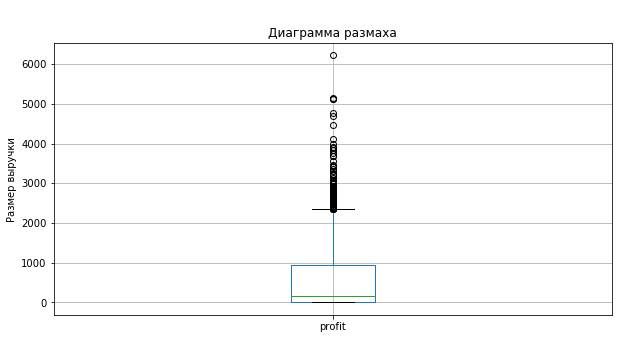

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   calls_duration         3214 non-null   float64       
 2   calls_count            3214 non-null   float64       
 3   message_sum            3214 non-null   float64       
 4   mb_sum                 3214 non-null   float64       
 5   gb_sum                 3214 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mon

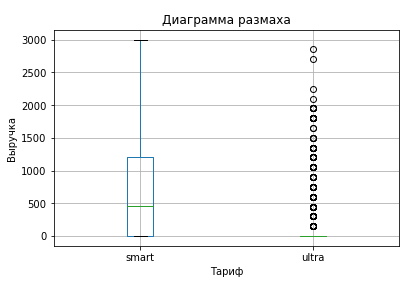

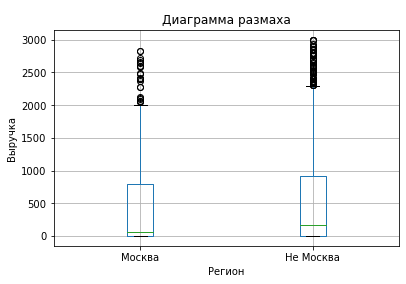

In [30]:
#построим диаграмму размаха для оценки выбросов.
report.boxplot(column = 'profit', figsize =(10,5))
plt.title('Диаграмма размаха'), plt.suptitle(' '), plt.ylabel('Размер выручки')
plt.show()

#уберём выбивающиеся значения из выручки:
report.info()
q1 = report['profit'].quantile(0.25)
q3 = report['profit'].quantile(0.75)
q_max = report['profit'].quantile(0.99)
iqr = q3 - q1
iqr_low = q1 - 1.5 * iqr 
iqr_high = q3 + 1.5 * iqr

#обрежем выбросы диаграммы размаха по более мягкому значению, чем дает среднеквадратичный интервал.
report =  report[report['profit'] <= q_max]
#report.info() #проверка

# добавления столбца, делящего населенные пункты на Москву и не Москву.
def region(column):
    for i in column:
        if 'Москва' in column:
            return 'Москва'
        else:
            return 'Не Москва'
        
report['is_Moscow'] =  report['city'].apply(region)

#report.info() #проверка

# оценка размаха выручки по тарифам
report.boxplot(column = 'profit',by='tariff',grid=True)
plt.title('Диаграмма размаха'),plt.suptitle(' '), plt.ylabel('Выручка'), plt.xlabel('Тариф')
plt.show()

# оценка размаха выручки по городам.
report.boxplot(column = 'profit',by='is_Moscow',grid=True)
plt.title('Диаграмма размаха'), plt.suptitle(' '), plt.ylabel('Выручка'), plt.xlabel('Регион')
plt.show()




<dl>Диаграммы размаха по тарифам точно говорят нам одну вещь: тариф Ультра достаточно широкий, что его пользователям не приходится вылезать за рамки абонентской платы, так часто, как это делают владельцы сим-карт Смарта.</dl>
   <dl> Пользователи за пределеами столицы также приносят больше денег оператору, чем москвичи.</dl>
 <dl>   Средние значения, СКО и дисперсии Смарта также во всем уступают Ультре, так как условия использования у данного тарифа жестче из-за его сниженной цены.</dl>

### Проверка гипотез

После того как мы почистили нашу совокупность данных, переходим к проверке гипотез:

In [31]:
#"гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" трансформируется в две статистические гипотезы:
#H0: средняя выручка по тарифам равна
#H1: средняя выручка по тарифам не равна
#По результатам стат-теста одна из этих гипотез подтвердится.

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

sample_1 = report.loc[report['tariff']=='ultra','profit']
sample_2 = report.loc[report['tariff']=='smart','profit']

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Cредняя выручка по тарифам не равна.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя выручка по тарифам равна.")
    
#среднняя выручка по тарифам       
print('Средняя выручка по тарифу Ультра: ', round(report.loc[report['tariff']=='ultra','profit'].mean()), 'рублей')
print('Средняя выручка по тарифу Смарт: ', round(report.loc[report['tariff']=='smart','profit'].mean()), 'рублей')

#"гипотеза: средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов" переводится в следующие статистические гипотезы:
#H0: средняя выручка по городам равна
#H1: средняя выручка по городам не равна

value_1 = report.loc[report['city']=='Москва','profit']
value_2 =  report.loc[report['city']!='Москва','profit']

results_2 = st.ttest_ind(
    value_1, 
    value_2)

print('p-значение: ', results_2.pvalue)

if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Cредняя выручка по городам не равна.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя выручка по городам близка.")
    
#среднняя выручка по городам    
print('Средняя выручка по Москве: ',  round(report.loc[report['city']=='Москва','profit'].mean()), 'рублей')
print('Средняя выручка по регионам: ',  round(report.loc[report['city']!='Москва','profit'].mean()), 'рублей')



p-значение:  5.89041855060624e-112
Отвергаем нулевую гипотезу. Cредняя выручка по тарифам не равна.
Средняя выручка по тарифу Ультра:  120 рублей
Средняя выручка по тарифу Смарт:  696 рублей
p-значение:  0.05360583954468514
Не получилось отвергнуть нулевую гипотезу. Средняя выручка по городам близка.
Средняя выручка по Москве:  469 рублей
Средняя выручка по регионам:  529 рублей


<dl>Мы сформулировали для каждого т-теста по 2 гипотезы.</dl>
<dl> Для первого теста по тарифам они звучат как:</dl>
<dl><li> H0: средняя выручка по тарифам равна</li>
  <li> H1: средняя выручка по тарифам не равна</li></dl>
 <dl>   Для второго же:
<li>    H0: средняя выручка по городам равна</li>
 <li>   H1: средняя выручка по городам не равна</li></dl>
 <dl>   alpha показатель был выбран одинаковым: 5 %, который принят считаться низшим уровнем для определения статистической значимости.</dl>
    Тест подтвердил наши наблюдения по ящику с усами тарифов, но, к удивлению, опроверг их по регионам. </dl>

### Общий вывод

<dl>Разделив исследовательские гипотезы на статистические мы получили 4 выборки для проверки.</dl>
<dl>Стат-тест показал нам, что наблюдаемые в исследование значения и зависимости  по тарифам далеко не случайны:
<li>Первая пара выборок поставила под сомнение равенство средних выручек по тарифам.</li>
<li>Вторая же подтвердила выроятность совпадения средних выручек по городам, хотя отдельно взятыми вне теста средние выручки и не совпали.</li></dl>
<dl>Для Мегалайна судя по средним выручкам наиболее выгодный тариф Смарт. Однако, необходимо учитывать, что стоимость услуг по данному тарифу для пользователя сильно ниже Ультры, а число пользователей, использующих его на максимум выше. Поэтому чтобы составить полную картину прибыльности тарифов нужно больше информации о себестоимости  услуг, что известно только самому оператору.   </dl>
<dl> С легким опережением выручка регионов также превосходит показатель Москвы, хотя и значения не такие выразительные, как по тарифу. </dl>
<dl>Выражаю свою надежду, что проведенное нами ислледование поможет менеджерам компании эффективно спланировать бюджет будущих рекламных компаний.</dl>
